In [1]:
import numpy as np
import pandas as pd




In [3]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
import os

cloud_config= {
  'secure_connect_bundle': 'secure-connect-network-project.zip'
}
auth_provider = PlainTextAuthProvider('vbThZfyFKuOrkzDwvhIeGrdk', 'oDe-9IZ3dJr54qKC3Mmk5MbZH,LWqQzZhJGeSEFubtzggh9U.BAIZ8HrSK2bvn5rczWDh-yI9CwU0P262ONJ2f0pYT,p7MW4u3aTuTt1+u9ZWII9HGU3_Odnp42_jDrq')
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session = cluster.connect()

session.set_keyspace('project')
# Read table from Cassandra
query = "SELECT * FROM data1"
result = session.execute(query)

# Extract column names from the result metadata
columns = result.column_names

# Create a pandas DataFrame from the result
df = pd.DataFrame(result, columns=columns)

row = session.execute(os.path.join("select release_version from system.local")).one()
if row:
  print(row[0])
else:
  print("An error occurred.")


4.0.0.6816


In [37]:
'''from cassandra.cluster import Cluster
import os
import sys

from sklearn.model_selection import train_test_split
from dataclasses import dataclass
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
import os
import pandas as pd


class DataIngestionconfig:
    train_data_path:str=os.path.join('artifacts','train.csv')
    test_data_path:str=os.path.join('artifacts','test.csv')
    raw_data_path:str=os.path.join('artifacts','raw.csv')
        
        
class DataIngestion:
    def __init__(self):
        self.ingestion_config = DataIngestionconfig()

    def initiate_data_ingestion(self):
        print('Data Ingestion methods Starts')
        try:
            cloud_config= {'secure_connect_bundle': 'secure-connect-network-project.zip'}
            auth_provider = PlainTextAuthProvider('vbThZfyFKuOrkzDwvhIeGrdk', 'oDe-9IZ3dJr54qKC3Mmk5MbZH,LWqQzZhJGeSEFubtzggh9U.BAIZ8HrSK2bvn5rczWDh-yI9CwU0P262ONJ2f0pYT,p7MW4u3aTuTt1+u9ZWII9HGU3_Odnp42_jDrq')
            cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider) 
            session = cluster.connect()

            session.set_keyspace('project')
# Read table from Cassandra
            query = "SELECT * FROM data1"
            result = session.execute(query)

# Extract column names from the result metadata
            columns = result.column_names

# Create a pandas DataFrame from the result
            df = pd.DataFrame(result, columns=columns)
            print('Dataset read from Cassandra into a pandas DataFrame')

            os.makedirs(os.path.dirname(self.ingestion_config.raw_data_path), exist_ok=True)
            df.to_csv(self.ingestion_config.raw_data_path, index=False)
            print('Train test split')
            train_set, test_set = train_test_split(df, test_size=0.30, random_state=42)

            train_set.to_csv(self.ingestion_config.train_data_path, index=False, header=True)
            test_set.to_csv(self.ingestion_config.test_data_path, index=False, header=True)

            print('Ingestion of Data is completed')

            return (
                self.ingestion_config.train_data_path,
                self.ingestion_config.test_data_path
            )
  
        except Exception as e:
            print('Exception occurred at Data Ingestion stage')
            raise CustomException(e, sys)

            
abc= DataIngestion()
train_data_path,test_data_path= abc.initiate_data_ingestion()  '''

Data Ingestion methods Starts
Dataset read from Cassandra into a pandas DataFrame
Train test split
Ingestion of Data is completed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Duration                3424 non-null   int64  
 1   AttackType              3424 non-null   object 
 2   Count                   3424 non-null   int64  
 3   DestinationBytes        3424 non-null   int64  
 4   DiffSrvRate             3424 non-null   float64
 5   DifficultyLevel         3424 non-null   int64  
 6   DstHostCount            3424 non-null   int64  
 7   DstHostDiffSrvRate      3424 non-null   float64
 8   DstHostRerrorRate       3424 non-null   float64
 9   DstHostSameSrcPortRate  3424 non-null   float64
 10  DstHostSameSrvRate      3424 non-null   float64
 11  DstHostSerrorRate       3424 non-null   float64
 12  DstHostSrvCount         3424 non-null   int64  
 13  DstHostSrvDiffHostRate  3424 non-null   float64
 14  DstHostSrvRerrorRate    3424 non-null   

In [4]:
from cassandra.cluster import Cluster
import pandas as pd

# Loading the dataset

In [5]:

df=pd.read_csv('data.csv',header=None)



C:\Users\tusha\AppData\Local\Temp\ipykernel_4896\921724396.py:1: DtypeWarning: Columns (0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data.csv',header=None)


In [6]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,Duration,ProtocolType,Service,Flag,SourceBytes,DestinationBytes,Land,WrongFragment,Urgent,Hot,...,DstHostSameSrvRate,DstHostDiffSrvRate,DstHostSameSrcPortRate,DstHostSrvDiffHostRate,DstHostSerrorRate,DstHostSrvSerrorRate,DstHostRerrorRate,DstHostSrvRerrorRate,AttackType,DifficultyLevel
1,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20


# Since the dataset doesn't have any relevant columns names. Defining the columns names suitable for each of the column after doing research on the data over the web

In [14]:
df=df.set_axis(['Duration',
 'ProtocolType',
 'Service',
 'Flag',
 'SourceBytes',
 'DestinationBytes',
 'Land',
 'WrongFragment',
 'Urgent',
 'Hot',
 'NumFailedLogins',
 'LoggedIn',
 'NumCompromised',
 'RootShell',
 'SuAttempted',
 'NumRoot',
 'NumFileCreations',
 'NumShells',
 'NumAccessFiles',
 'NumOutboundCmds',
 'IsHostLogin',
 'IsGuestLogin',
 'Count',
 'SrvCount',
 'SerrorRate',
 'SrvSerrorRate',
 'RerrorRate',
 'SrvRerrorRate',
 'SameSrvRate',
 'DiffSrvRate',
 'SrvDiffHostRate',
 'DstHostCount',
 'DstHostSrvCount',
 'DstHostSameSrvRate',
 'DstHostDiffSrvRate',
 'DstHostSameSrcPortRate',
 'DstHostSrvDiffHostRate',
 'DstHostSerrorRate',
 'DstHostSrvSerrorRate',
 'DstHostRerrorRate',
 'DstHostSrvRerrorRate',
 'AttackType',
 'DifficultyLevel'], axis=1)

In [15]:
df.columns

Index(['Duration', 'ProtocolType', 'Service', 'Flag', 'SourceBytes',
       'DestinationBytes', 'Land', 'WrongFragment', 'Urgent', 'Hot',
       'NumFailedLogins', 'LoggedIn', 'NumCompromised', 'RootShell',
       'SuAttempted', 'NumRoot', 'NumFileCreations', 'NumShells',
       'NumAccessFiles', 'NumOutboundCmds', 'IsHostLogin', 'IsGuestLogin',
       'Count', 'SrvCount', 'SerrorRate', 'SrvSerrorRate', 'RerrorRate',
       'SrvRerrorRate', 'SameSrvRate', 'DiffSrvRate', 'SrvDiffHostRate',
       'DstHostCount', 'DstHostSrvCount', 'DstHostSameSrvRate',
       'DstHostDiffSrvRate', 'DstHostSameSrcPortRate',
       'DstHostSrvDiffHostRate', 'DstHostSerrorRate', 'DstHostSrvSerrorRate',
       'DstHostRerrorRate', 'DstHostSrvRerrorRate', 'AttackType',
       'DifficultyLevel'],
      dtype='object')

In [16]:
df.head()

,Duration,ProtocolType,Service,Flag,SourceBytes,DestinationBytes,Land,WrongFragment,Urgent,Hot,...,DstHostSameSrvRate,DstHostDiffSrvRate,DstHostSameSrcPortRate,DstHostSrvDiffHostRate,DstHostSerrorRate,DstHostSrvSerrorRate,DstHostRerrorRate,DstHostSrvRerrorRate,AttackType,DifficultyLevel
0,Duration,ProtocolType,Service,Flag,SourceBytes,DestinationBytes,Land,WrongFragment,Urgent,Hot,...,DstHostSameSrvRate,DstHostDiffSrvRate,DstHostSameSrcPortRate,DstHostSrvDiffHostRate,DstHostSerrorRate,DstHostSrvSerrorRate,DstHostRerrorRate,DstHostSrvRerrorRate,AttackType,DifficultyLevel
1,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20
2,0,udp,other,SF,146,0,0,0,0,0,...,0.0,0.6,0.88,0.0,0.0,0.0,0.0,0.0,normal,15
3,0,tcp,private,S0,0,0,0,0,0,0,...,0.1,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune,19
4,0,tcp,http,SF,232,8153,0,0,0,0,...,1.0,0.0,0.03,0.04,0.03,0.01,0.0,0.01,normal,21



# Understanding each column of the dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148518 entries, 0 to 148517
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Duration                148518 non-null  object
 1   ProtocolType            148518 non-null  object
 2   Service                 148518 non-null  object
 3   Flag                    148518 non-null  object
 4   SourceBytes             148518 non-null  object
 5   DestinationBytes        148518 non-null  object
 6   Land                    148518 non-null  object
 7   WrongFragment           148518 non-null  object
 8   Urgent                  148518 non-null  object
 9   Hot                     148518 non-null  object
 10  NumFailedLogins         148518 non-null  object
 11  LoggedIn                148518 non-null  object
 12  NumCompromised          148518 non-null  object
 13  RootShell               148518 non-null  object
 14  SuAttempted             148518 non-n

# Understanding the Mathematical aspect of the data

In [9]:
df.describe(include='all')

,Duration,ProtocolType,Service,Flag,SourceBytes,DestinationBytes,Land,WrongFragment,Urgent,Hot,...,DstHostSameSrvRate,DstHostDiffSrvRate,DstHostSameSrcPortRate,DstHostSrvDiffHostRate,DstHostSerrorRate,DstHostSrvSerrorRate,DstHostRerrorRate,DstHostSrvRerrorRate,AttackType,DifficultyLevel
count,125973.00000,125973,125973,125973,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973,125973.000000
unique,NaN,3,70,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,NaN
top,NaN,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,NaN
freq,NaN,102689,40338,74945,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67343,NaN
mean,287.14465,NaN,NaN,NaN,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,...,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,NaN,19.504060
std,2604.51531,NaN,NaN,NaN,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,...,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,NaN,2.291503
min,0.00000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,0.00000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,18.000000
50%,0.00000,NaN,NaN,NaN,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,20.000000
75%,0.00000,NaN,NaN,NaN,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,NaN,21.000000


# Cheking for null values
if present then either replace the Null value by appropriate one (mean, median,mode) 
# Fill na with mean or median or mode 
data['column_name'].fillna(data['column_name'].mean(), inplace=True)

or 
delete the nan value by using
# Delete rows with any missing value
data.dropna(axis=0, inplace=True)

# Delete columns with any missing value
data.dropna(axis=1, inplace=True)

In [10]:
df.isnull().sum()

Duration                  0
ProtocolType              0
Service                   0
Flag                      0
SourceBytes               0
DestinationBytes          0
Land                      0
WrongFragment             0
Urgent                    0
Hot                       0
NumFailedLogins           0
LoggedIn                  0
NumCompromised            0
RootShell                 0
SuAttempted               0
NumRoot                   0
NumFileCreations          0
NumShells                 0
NumAccessFiles            0
NumOutboundCmds           0
IsHostLogin               0
IsGuestLogin              0
Count                     0
SrvCount                  0
SerrorRate                0
SrvSerrorRate             0
RerrorRate                0
SrvRerrorRate             0
SameSrvRate               0
DiffSrvRate               0
SrvDiffHostRate           0
DstHostCount              0
DstHostSrvCount           0
DstHostSameSrvRate        0
DstHostDiffSrvRate        0
DstHostSameSrcPortRa

# Handle the duplicate values
import pandas as pd



# Check for duplicate rows
duplicate_rows = data.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Reset the index after removing duplicates
data.reset_index(drop=True, inplace=True)


In [11]:
df[df.duplicated()]

,Duration,ProtocolType,Service,Flag,SourceBytes,DestinationBytes,Land,WrongFragment,Urgent,Hot,...,DstHostSameSrvRate,DstHostDiffSrvRate,DstHostSameSrcPortRate,DstHostSrvDiffHostRate,DstHostSerrorRate,DstHostSrvSerrorRate,DstHostRerrorRate,DstHostSrvRerrorRate,AttackType,DifficultyLevel


# Calculate summary statistics

In [12]:
df.describe()
#for muerical columns


,Duration,SourceBytes,DestinationBytes,Land,WrongFragment,Urgent,Hot,NumFailedLogins,LoggedIn,NumCompromised,...,DstHostSrvCount,DstHostSameSrvRate,DstHostDiffSrvRate,DstHostSameSrcPortRate,DstHostSrvDiffHostRate,DstHostSerrorRate,DstHostSrvSerrorRate,DstHostRerrorRate,DstHostSrvRerrorRate,DifficultyLevel
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [13]:
df.describe(include= 'all')

,Duration,ProtocolType,Service,Flag,SourceBytes,DestinationBytes,Land,WrongFragment,Urgent,Hot,...,DstHostSameSrvRate,DstHostDiffSrvRate,DstHostSameSrcPortRate,DstHostSrvDiffHostRate,DstHostSerrorRate,DstHostSrvSerrorRate,DstHostRerrorRate,DstHostSrvRerrorRate,AttackType,DifficultyLevel
count,125973.00000,125973,125973,125973,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973,125973.000000
unique,NaN,3,70,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,NaN
top,NaN,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,NaN
freq,NaN,102689,40338,74945,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67343,NaN
mean,287.14465,NaN,NaN,NaN,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,...,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,NaN,19.504060
std,2604.51531,NaN,NaN,NaN,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,...,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,NaN,2.291503
min,0.00000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,0.00000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,18.000000
50%,0.00000,NaN,NaN,NaN,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,20.000000
75%,0.00000,NaN,NaN,NaN,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,NaN,21.000000


# Visualize the distributions of numerical variables using histograms, box plots, or density plots. Analyze the skewness and kurtosis to understand the shape of the distributions.

In [14]:
df.select_dtypes(exclude=object).columns

Index(['Duration', 'SourceBytes', 'DestinationBytes', 'Land', 'WrongFragment',
       'Urgent', 'Hot', 'NumFailedLogins', 'LoggedIn', 'NumCompromised',
       'RootShell', 'SuAttempted', 'NumRoot', 'NumFileCreations', 'NumShells',
       'NumAccessFiles', 'NumOutboundCmds', 'IsHostLogin', 'IsGuestLogin',
       'Count', 'SrvCount', 'SerrorRate', 'SrvSerrorRate', 'RerrorRate',
       'SrvRerrorRate', 'SameSrvRate', 'DiffSrvRate', 'SrvDiffHostRate',
       'DstHostCount', 'DstHostSrvCount', 'DstHostSameSrvRate',
       'DstHostDiffSrvRate', 'DstHostSameSrcPortRate',
       'DstHostSrvDiffHostRate', 'DstHostSerrorRate', 'DstHostSrvSerrorRate',
       'DstHostRerrorRate', 'DstHostSrvRerrorRate', 'DifficultyLevel'],
      dtype='object')

In [15]:
df.select_dtypes(include=object).columns

Index(['ProtocolType', 'Service', 'Flag', 'AttackType'], dtype='object')

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Function to plot histogram
def plot_histogram(df, column):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Function to plot box plot
def plot_boxplot(df, column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

# Function to plot density plot
def plot_density(df, column):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df[column], shade=True)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

# Analyze skewness and kurtosis
def analyze_distribution(df, column):
    skewness = df[column].skew()
    kurtosis = df[column].kurtosis()
    print(f'Skewness of {column}: {skewness:.2f}')
    print(f'Kurtosis of {column}: {kurtosis:.2f}')



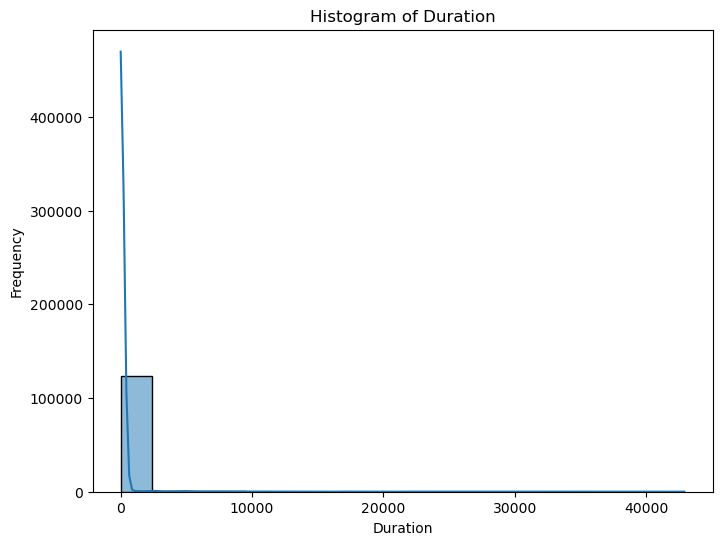

Skewness of Duration: 11.88
Kurtosis of Duration: 156.08


In [17]:
plot_histogram(df, 'Duration')
analyze_distribution(df, 'Duration')


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numerical_columns(df, columns):
    numerical_columns = df[columns].select_dtypes(include=['int64', 'float64']).columns

    for column in numerical_columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.show()
    
    # Summary statistics using describe
    numerical_summary = df[columns].describe()
    print("Numerical Column Summary Statistics:")
    print(numerical_summary)


def plot_categorical_columns(df, columns):
    categorical_columns = df[columns].select_dtypes(include=['object']).columns

    for column in categorical_columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=column)
        plt.title(f"Count of {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()
        
        unique_values = df[column].unique()
        print(f"Unique values for {column}:")
        print(unique_values)
    
    # Summary statistics using describe
    categorical_summary = df[columns].describe(include='object')
    print("Categorical Column Summary Statistics:")
    print(categorical_summary)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def pieplot_categorical_columns(df, columns):
    categorical_columns = df[columns].select_dtypes(include=['object']).columns

    for column in categorical_columns:
        plt.figure(figsize=(10, 6))
        counts = df[column].value_counts()
        labels = counts.index
        sizes = counts.values
        percentages = sizes / sizes.sum() * 100  # Calculate percentage contribution
        labels_with_percentages = [f"{label} ({percentage:.1f}%)" for label, percentage in zip(labels, percentages)]
        plt.pie(sizes, labels=labels_with_percentages, autopct='%1.1f%%', startangle=90)
        plt.title(f"Distribution of {column}")
        plt.axis('equal')
        plt.show()
        
        unique_values = df[column].unique()
        contribution = df[column].value_counts(normalize=True) * 100  # Calculate contribution as percentage
        print(f"Unique values for {column}:")
        for value in unique_values:
            print(f"{value}: {contribution[value]:.1f}%")
    
    # Summary statistics using describe
    categorical_summary = df[columns].describe(include='object')
    print("Categorical Column Summary Statistics:")
    print(categorical_summary)


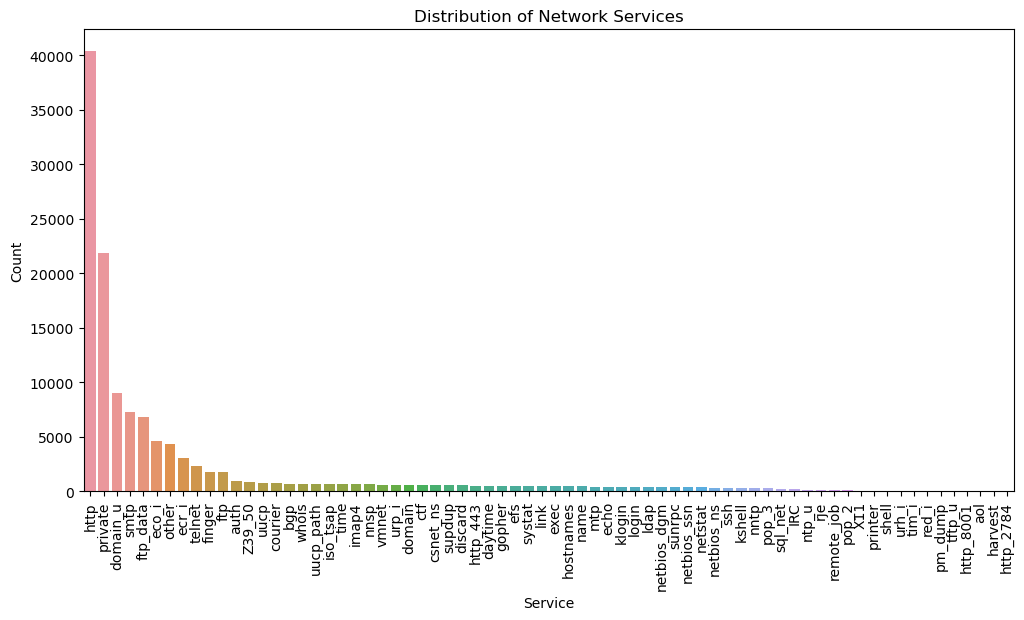

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

service_counts = df['Service'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=service_counts.index, y=service_counts.values)
plt.title("Distribution of Network Services")
plt.xlabel("Service")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


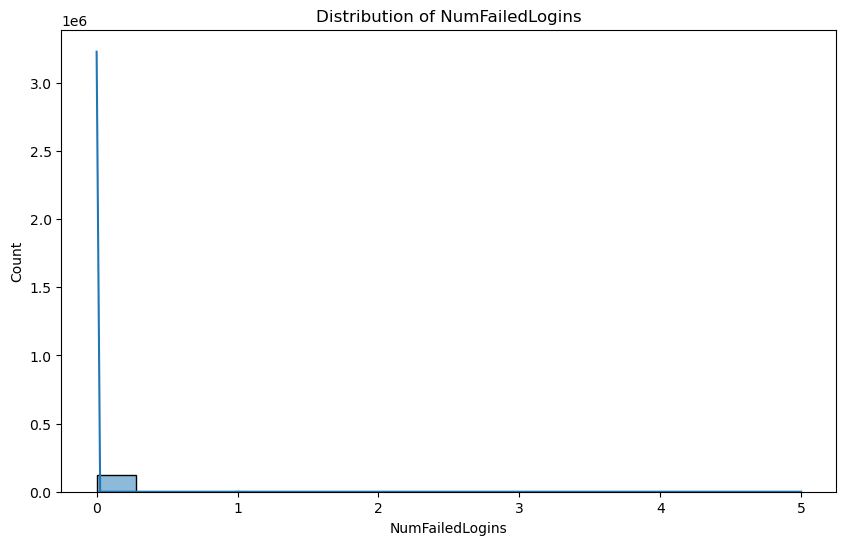

Numerical Column Summary Statistics:
       NumFailedLogins
count    125973.000000
mean          0.001222
std           0.045239
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000


In [21]:
plot_numerical_columns(df, ['NumFailedLogins'])

In [ ]:
plot_categorical_columns(df, ['ProtocolType','Service', 'Flag', 'AttackType'])

# Explore relationships between variables

C:\Users\tusha\AppData\Local\Temp\ipykernel_18296\2427941450.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


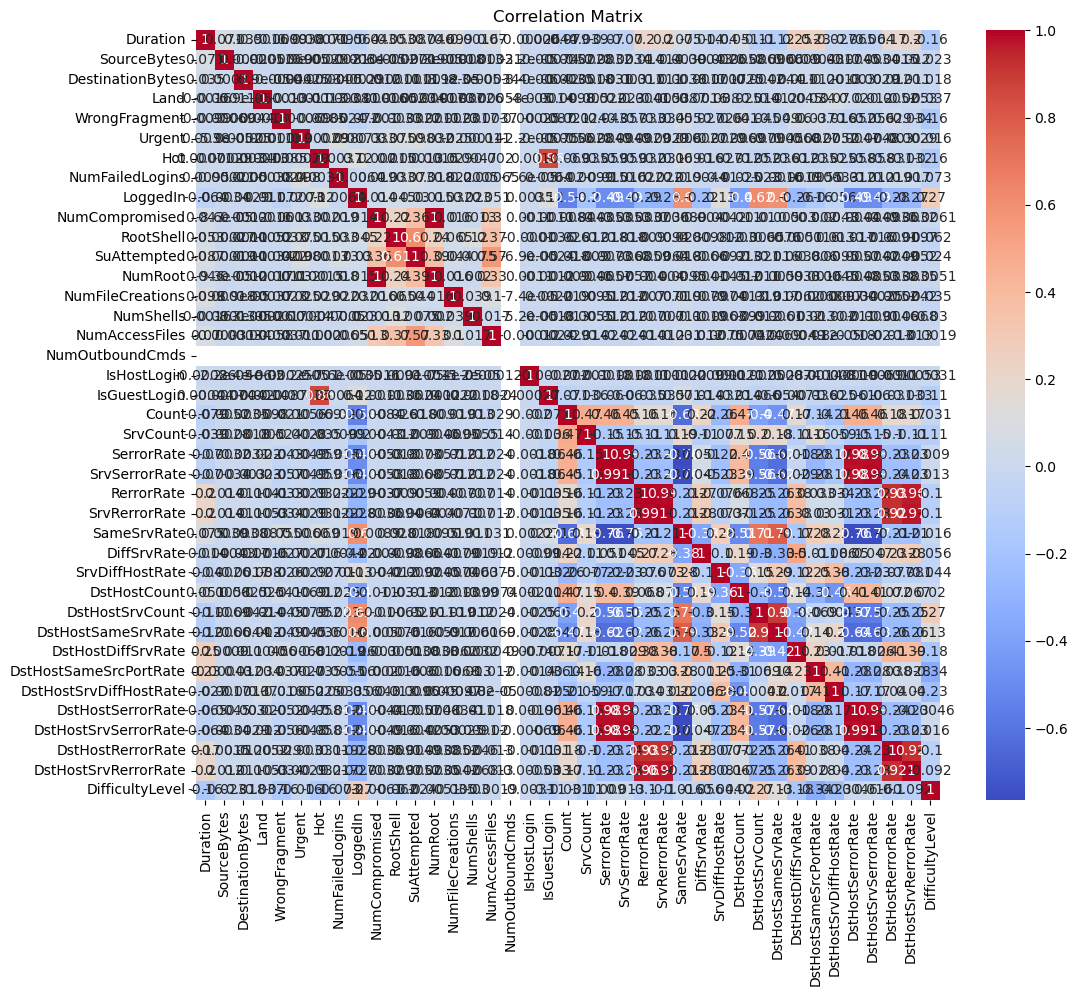

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
plot_correlation_matrix(df)

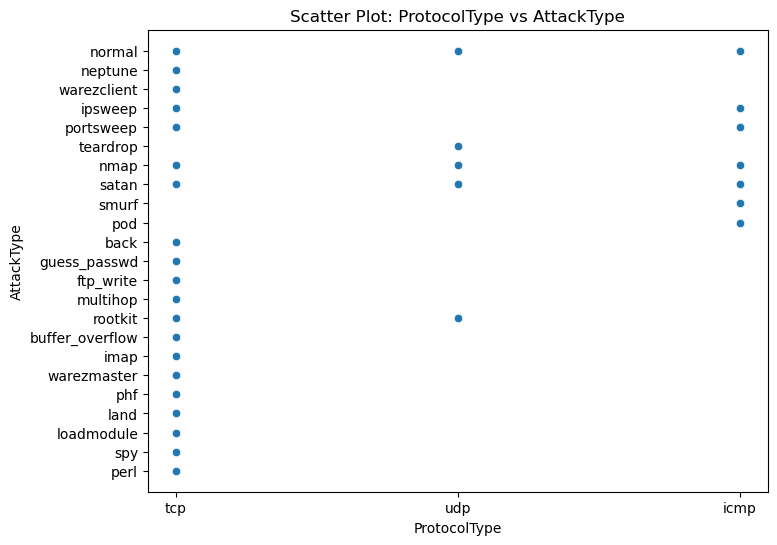

In [14]:
def plot_scatter(data, x, y):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=x, y=y)
    plt.title(f'Scatter Plot: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
plot_scatter(df, 'ProtocolType', 'AttackType')

In [ ]:
data= df[['ProtocolType','Service','Flag','AttackType']]

In [ ]:
data.head()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Assuming your dataset is stored in a DataFrame called 'data'
# Select the categorical columns for correlation analysis
categorical_columns = ['ProtocolType', 'Service', 'Flag', 'AttackType']

# Compute the Cramér's V statistic for each pair of categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate the Cramér's V statistic for each pair of categorical variables
correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
for i in range(len(categorical_columns)):
    for j in range(len(categorical_columns)):
        correlation_matrix.iloc[i, j] = cramers_v(data[categorical_columns[i]], data[categorical_columns[j]])

# Convert the correlation matrix to numeric values
correlation_matrix = correlation_matrix.astype(float)

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Categorical Correlation Matrix Heatmap")
plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'data'
correlations = df.corr()

# Convert correlation matrix to a graph
graph = nx.from_pandas_adjacency(correlations)

# Visualize the graph
plt.figure(figsize=(12, 10))
nx.draw_networkx(graph, with_labels=True, node_color='lightblue', edge_color='gray', font_size=8, alpha=0.7)
plt.title('Correlation Network Graph')
plt.axis('off')
plt.show()


In [ ]:
data[data['ProtocolType'] == 'tcp']

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'data'
pca = PCA(n_components=2)  # Choose the number of components to visualize
transformed_data = pca.fit_transform(dfe45re3)

plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Principal Component Analysis
to understand the 

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [23]:
df.head(1)

,Duration,ProtocolType,Service,Flag,SourceBytes,DestinationBytes,Land,WrongFragment,Urgent,Hot,...,DstHostSameSrvRate,DstHostDiffSrvRate,DstHostSameSrcPortRate,DstHostSrvDiffHostRate,DstHostSerrorRate,DstHostSrvSerrorRate,DstHostRerrorRate,DstHostSrvRerrorRate,AttackType,DifficultyLevel
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20


In [24]:
df['AttackType'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [25]:
pca_df1=df.drop(['ProtocolType','Service','Flag','AttackType','DifficultyLevel'],axis=1)

In [26]:
pca_df1.head(5)

,Duration,SourceBytes,DestinationBytes,Land,WrongFragment,Urgent,Hot,NumFailedLogins,LoggedIn,NumCompromised,...,DstHostCount,DstHostSrvCount,DstHostSameSrvRate,DstHostDiffSrvRate,DstHostSameSrcPortRate,DstHostSrvDiffHostRate,DstHostSerrorRate,DstHostSrvSerrorRate,DstHostRerrorRate,DstHostSrvRerrorRate
0,0,491,0,0,0,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,146,0,0,0,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,0,0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,232,8153,0,0,0,0,0,1,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,199,420,0,0,0,0,0,1,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [27]:
pca_df1.columns

Index(['Duration', 'SourceBytes', 'DestinationBytes', 'Land', 'WrongFragment',
       'Urgent', 'Hot', 'NumFailedLogins', 'LoggedIn', 'NumCompromised',
       'RootShell', 'SuAttempted', 'NumRoot', 'NumFileCreations', 'NumShells',
       'NumAccessFiles', 'NumOutboundCmds', 'IsHostLogin', 'IsGuestLogin',
       'Count', 'SrvCount', 'SerrorRate', 'SrvSerrorRate', 'RerrorRate',
       'SrvRerrorRate', 'SameSrvRate', 'DiffSrvRate', 'SrvDiffHostRate',
       'DstHostCount', 'DstHostSrvCount', 'DstHostSameSrvRate',
       'DstHostDiffSrvRate', 'DstHostSameSrcPortRate',
       'DstHostSrvDiffHostRate', 'DstHostSerrorRate', 'DstHostSrvSerrorRate',
       'DstHostRerrorRate', 'DstHostSrvRerrorRate'],
      dtype='object')

In [28]:
pca_df1.set_axis(['Duration', 'SourceBytes', 'DestinationBytes', 'Land', 'WrongFragment',
       'Urgent', 'Hot', 'NumFailedLogins', 'LoggedIn', 'NumCompromised',
       'RootShell', 'SuAttempted', 'NumRoot', 'NumFileCreations', 'NumShells',
       'NumAccessFiles', 'NumOutboundCmds', 'IsHostLogin', 'IsGuestLogin',
       'Count', 'SrvCount', 'SerrorRate', 'SrvSerrorRate', 'RerrorRate',
       'SrvRerrorRate', 'SameSrvRate', 'DiffSrvRate', 'SrvDiffHostRate',
       'DstHostCount', 'DstHostSrvCount', 'DstHostSameSrvRate',
       'DstHostDiffSrvRate', 'DstHostSameSrcPortRate',
       'DstHostSrvDiffHostRate', 'DstHostSerrorRate', 'DstHostSrvSerrorRate',
       'DstHostRerrorRate', 'DstHostSrvRerrorRate'],axis=1)

,Duration,SourceBytes,DestinationBytes,Land,WrongFragment,Urgent,Hot,NumFailedLogins,LoggedIn,NumCompromised,...,DstHostCount,DstHostSrvCount,DstHostSameSrvRate,DstHostDiffSrvRate,DstHostSameSrcPortRate,DstHostSrvDiffHostRate,DstHostSerrorRate,DstHostSrvSerrorRate,DstHostRerrorRate,DstHostSrvRerrorRate
0,0,491,0,0,0,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,146,0,0,0,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,0,0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,232,8153,0,0,0,0,0,1,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,199,420,0,0,0,0,0,1,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,8,105,145,0,0,0,0,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,0,2231,384,0,0,0,0,0,1,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,0,0,0,0,0,0,0,0,0,0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [29]:
scaled_df = scaler.fit_transform(pca_df1)

In [30]:
from sklearn.decomposition import PCA
pca=PCA()

In [31]:
pca_data=pca.fit_transform(scaled_df)

In [32]:
pd.DataFrame(pca_data,columns=['Duration', 'SourceBytes', 'DestinationBytes', 'Land', 'WrongFragment',
       'Urgent', 'Hot', 'NumFailedLogins', 'LoggedIn', 'NumCompromised',
       'RootShell', 'SuAttempted', 'NumRoot', 'NumFileCreations', 'NumShells',
       'NumAccessFiles', 'NumOutboundCmds', 'IsHostLogin', 'IsGuestLogin',
       'Count', 'SrvCount', 'SerrorRate', 'SrvSerrorRate', 'RerrorRate',
       'SrvRerrorRate', 'SameSrvRate', 'DiffSrvRate', 'SrvDiffHostRate',
       'DstHostCount', 'DstHostSrvCount', 'DstHostSameSrvRate',
       'DstHostDiffSrvRate', 'DstHostSameSrcPortRate',
       'DstHostSrvDiffHostRate', 'DstHostSerrorRate', 'DstHostSrvSerrorRate',
       'DstHostRerrorRate', 'DstHostSrvRerrorRate'])

,Duration,SourceBytes,DestinationBytes,Land,WrongFragment,Urgent,Hot,NumFailedLogins,LoggedIn,NumCompromised,...,DstHostCount,DstHostSrvCount,DstHostSameSrvRate,DstHostDiffSrvRate,DstHostSameSrcPortRate,DstHostSrvDiffHostRate,DstHostSerrorRate,DstHostSrvSerrorRate,DstHostRerrorRate,DstHostSrvRerrorRate
0,-0.684647,-0.072229,-0.020625,0.006646,-0.300676,0.151133,-0.272579,0.484532,0.052372,0.126796,...,-0.148772,0.236486,-0.440807,0.077454,0.062334,-0.004436,-0.044790,-0.015491,-0.003027,-2.010484e-17
1,0.611338,1.118988,0.024890,-0.490833,-1.283359,1.602902,-1.148140,2.225400,-1.029289,0.072066,...,0.306929,-1.169750,0.741952,-0.088862,0.028855,0.031796,0.066010,0.036739,-0.002013,-2.295491e-19
2,3.699843,-1.457102,0.021828,-0.098542,-0.269719,-0.429771,0.073443,-0.103191,0.188713,-0.001006,...,0.155068,-0.152005,0.142048,-0.015718,-0.023863,0.002600,0.000028,0.003039,0.000578,8.865614e-19
3,-2.367244,-1.050532,-0.078453,0.112635,0.194854,-1.033781,0.065179,0.056351,0.058528,0.010906,...,0.045095,-0.139964,-0.095602,0.072109,0.324334,-0.108801,0.056071,0.037554,-0.001326,-5.847942e-18
4,-2.145148,-0.887945,-0.121835,0.509996,1.246036,-0.435106,-0.129529,0.272378,0.057260,-0.017308,...,-0.032543,0.085057,0.086784,-0.021080,0.009334,0.009986,0.004175,-0.003219,0.002378,-1.802332e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,3.750576,-1.442392,0.005119,-0.144023,-0.050953,-0.063692,0.121545,-0.250948,0.198853,-0.010745,...,-0.009407,0.024382,-0.004881,0.000824,-0.012448,0.005120,-0.006472,-0.000586,0.000434,5.532369e-19
125969,-1.555271,-0.603030,-0.136902,0.224428,0.975786,-0.127425,-0.109111,0.249397,0.153886,0.049945,...,-0.241742,0.161235,-0.067660,0.061493,-0.015502,0.014505,-0.002350,-0.008417,0.001161,3.713843e-19
125970,-0.347762,-0.628831,0.035748,0.653638,0.156784,-0.640906,-0.486599,0.817467,0.057801,0.082614,...,-0.166176,0.291750,-0.322404,0.017067,-1.003046,-0.641247,0.489974,0.169568,0.002060,-1.300994e-18
125971,3.821472,-1.433322,0.026790,-0.104152,-0.274790,-0.335883,0.083480,-0.155595,0.228905,0.003620,...,0.087669,-0.107161,0.081391,-0.008914,-0.010444,0.002732,-0.002630,0.001845,0.000261,5.296690e-19


In [33]:
np.set_printoptions(suppress=True)

In [34]:
pca.explained_variance_ratio_

array([0.18909372, 0.13206896, 0.07598484, 0.05305192, 0.05065752,
       0.04288692, 0.03623603, 0.03395012, 0.03015029, 0.02941164,
       0.0274538 , 0.02720675, 0.02702975, 0.02702547, 0.026745  ,
       0.02666727, 0.02498259, 0.02436006, 0.01842379, 0.0163584 ,
       0.01377202, 0.01226451, 0.01182595, 0.00982457, 0.00849956,
       0.00743574, 0.00456986, 0.00373066, 0.00261457, 0.00178845,
       0.00134218, 0.00106858, 0.00071117, 0.00043717, 0.00024473,
       0.00011054, 0.00001491, 0.        ])

In [35]:
#from the entire data we are extracting 95% info
sum(sorted(pca.explained_variance_ratio_,reverse=True)[:35])*100

99.98745520253625

In [36]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [37]:
cumsum

array([0.18909372, 0.32116268, 0.39714751, 0.45019943, 0.50085695,
       0.54374387, 0.5799799 , 0.61393002, 0.64408031, 0.67349196,
       0.70094575, 0.72815251, 0.75518225, 0.78220773, 0.80895273,
       0.83562   , 0.86060259, 0.88496265, 0.90338644, 0.91974483,
       0.93351686, 0.94578137, 0.95760731, 0.96743188, 0.97593144,
       0.98336718, 0.98793704, 0.9916677 , 0.99428227, 0.99607072,
       0.9974129 , 0.99848148, 0.99919265, 0.99962983, 0.99987455,
       0.99998509, 1.        , 1.        ])

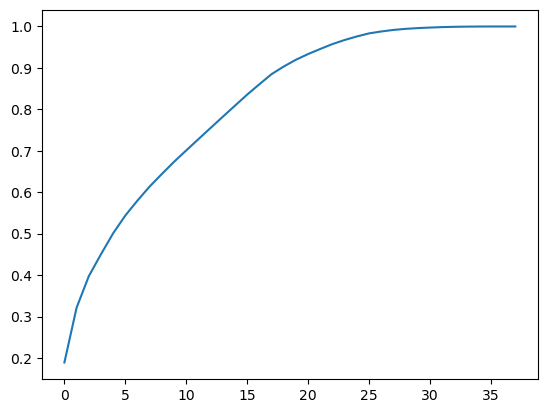

In [38]:
import matplotlib.pyplot as plt
plt.plot(cumsum)
plt.show()

# Model Building

In [39]:
df.head()

,Duration,ProtocolType,Service,Flag,SourceBytes,DestinationBytes,Land,WrongFragment,Urgent,Hot,...,DstHostSameSrvRate,DstHostDiffSrvRate,DstHostSameSrcPortRate,DstHostSrvDiffHostRate,DstHostSerrorRate,DstHostSrvSerrorRate,DstHostRerrorRate,DstHostSrvRerrorRate,AttackType,DifficultyLevel
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [40]:
df['AttackType'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [41]:
df1=pd.read_csv('KDDTest+.txt',header=None)

In [42]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [43]:
df1.set_axis(['Duration',
 'ProtocolType',
 'Service',
 'Flag',
 'SourceBytes',
 'DestinationBytes',
 'Land',
 'WrongFragment',
 'Urgent',
 'Hot',
 'NumFailedLogins',
 'LoggedIn',
 'NumCompromised',
 'RootShell',
 'SuAttempted',
 'NumRoot',
 'NumFileCreations',
 'NumShells',
 'NumAccessFiles',
 'NumOutboundCmds',
 'IsHostLogin',
 'IsGuestLogin',
 'Count',
 'SrvCount',
 'SerrorRate',
 'SrvSerrorRate',
 'RerrorRate',
 'SrvRerrorRate',
 'SameSrvRate',
 'DiffSrvRate',
 'SrvDiffHostRate',
 'DstHostCount',
 'DstHostSrvCount',
 'DstHostSameSrvRate',
 'DstHostDiffSrvRate',
 'DstHostSameSrcPortRate',
 'DstHostSrvDiffHostRate',
 'DstHostSerrorRate',
 'DstHostSrvSerrorRate',
 'DstHostRerrorRate',
 'DstHostSrvRerrorRate',
 'AttackType',
 'DifficultyLevel'], axis=1, inplace=True)

C:\Users\tusha\AppData\Local\Temp\ipykernel_21368\1097870697.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df1.set_axis(['Duration',


In [44]:
df1.head()

,Duration,ProtocolType,Service,Flag,SourceBytes,DestinationBytes,Land,WrongFragment,Urgent,Hot,...,DstHostSameSrvRate,DstHostDiffSrvRate,DstHostSameSrcPortRate,DstHostSrvDiffHostRate,DstHostSerrorRate,DstHostSrvSerrorRate,DstHostRerrorRate,DstHostSrvRerrorRate,AttackType,DifficultyLevel
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [45]:
df1['AttackType'].unique()

array(['neptune', 'normal', 'saint', 'mscan', 'guess_passwd', 'smurf',
       'apache2', 'satan', 'buffer_overflow', 'back', 'warezmaster',
       'snmpgetattack', 'processtable', 'pod', 'httptunnel', 'nmap', 'ps',
       'snmpguess', 'ipsweep', 'mailbomb', 'portsweep', 'multihop',
       'named', 'sendmail', 'loadmodule', 'xterm', 'worm', 'teardrop',
       'rootkit', 'xlock', 'perl', 'land', 'xsnoop', 'sqlattack',
       'ftp_write', 'imap', 'udpstorm', 'phf'], dtype=object)

In [46]:
df['AttackType'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [47]:
fdata= pd.concat([df,df1])

In [48]:
fdata.to_csv('data.csv',header=True, index=False)

In [49]:
fdata['AttackType'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

In [50]:
#fdata['AttackType']=fdata['AttackType'].apply(lambda x: 0 if x == 'normal' else 1)

In [51]:
fdata['AttackType'].value_counts()

normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm               2


# Feature Engineering

In [147]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148517 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Duration                148517 non-null  int64  
 1   ProtocolType            148517 non-null  object 
 2   Service                 148517 non-null  object 
 3   Flag                    148517 non-null  object 
 4   SourceBytes             148517 non-null  int64  
 5   DestinationBytes        148517 non-null  int64  
 6   Land                    148517 non-null  int64  
 7   WrongFragment           148517 non-null  int64  
 8   Urgent                  148517 non-null  int64  
 9   Hot                     148517 non-null  int64  
 10  NumFailedLogins         148517 non-null  int64  
 11  LoggedIn                148517 non-null  int64  
 12  NumCompromised          148517 non-null  int64  
 13  RootShell               148517 non-null  int64  
 14  SuAttempted          

In [148]:
fdata.isnull().sum()

Duration                  0
ProtocolType              0
Service                   0
Flag                      0
SourceBytes               0
DestinationBytes          0
Land                      0
WrongFragment             0
Urgent                    0
Hot                       0
NumFailedLogins           0
LoggedIn                  0
NumCompromised            0
RootShell                 0
SuAttempted               0
NumRoot                   0
NumFileCreations          0
NumShells                 0
NumAccessFiles            0
NumOutboundCmds           0
IsHostLogin               0
IsGuestLogin              0
Count                     0
SrvCount                  0
SerrorRate                0
SrvSerrorRate             0
RerrorRate                0
SrvRerrorRate             0
SameSrvRate               0
DiffSrvRate               0
SrvDiffHostRate           0
DstHostCount              0
DstHostSrvCount           0
DstHostSameSrvRate        0
DstHostDiffSrvRate        0
DstHostSameSrcPortRa

In [149]:
#Separating Independent and Dependent Feature.
X = fdata.drop(columns=['AttackType','DifficultyLevel'])

In [150]:
y = fdata['AttackType']

In [151]:
y

0         normal
1         normal
2        neptune
3         normal
4         normal
          ...   
22539     normal
22540     normal
22541       back
22542     normal
22543      mscan
Name: AttackType, Length: 148517, dtype: object

In [152]:
# Define which column needs ordinal-encoding and which columns need scaling
categorical_cols=X.select_dtypes(include='object').columns
numerical_cols=X.select_dtypes(exclude='object').columns

In [153]:
categorical_cols

Index(['ProtocolType', 'Service', 'Flag'], dtype='object')

In [154]:
numerical_cols

Index(['Duration', 'SourceBytes', 'DestinationBytes', 'Land', 'WrongFragment',
       'Urgent', 'Hot', 'NumFailedLogins', 'LoggedIn', 'NumCompromised',
       'RootShell', 'SuAttempted', 'NumRoot', 'NumFileCreations', 'NumShells',
       'NumAccessFiles', 'NumOutboundCmds', 'IsHostLogin', 'IsGuestLogin',
       'Count', 'SrvCount', 'SerrorRate', 'SrvSerrorRate', 'RerrorRate',
       'SrvRerrorRate', 'SameSrvRate', 'DiffSrvRate', 'SrvDiffHostRate',
       'DstHostCount', 'DstHostSrvCount', 'DstHostSameSrvRate',
       'DstHostDiffSrvRate', 'DstHostSameSrcPortRate',
       'DstHostSrvDiffHostRate', 'DstHostSerrorRate', 'DstHostSrvSerrorRate',
       'DstHostRerrorRate', 'DstHostSrvRerrorRate'],
      dtype='object')

In [155]:
#Define custom ranking for data of each ordinal columns
Protocol= ['tcp', 'udp', 'icmp']

Services= ['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest']

Flag= ['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3','S2', 'OTH']

In [156]:
from sklearn.impute import SimpleImputer
#simple imputer is used for replacing missing values with simple strategy such as mean , median and most frequent

from sklearn.preprocessing import StandardScaler  # feature scaling

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder # convert object data(containing ranked data i.e categorical features) to numerical data

from sklearn.pipeline import Pipeline #pipeline comnnecting simple umputer->standard scaler-> ordinal encoder

from sklearn.compose import ColumnTransformer #to combine all above steps
from sklearn.base import BaseEstimator, TransformerMixin

In [157]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)


# Categorigal Pipeline
cat_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('labelencoder', OrdinalEncoder(categories=[Protocol, Services, Flag])),
        ('scaler', StandardScaler())
    ]
)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])


In [158]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=30)

In [159]:
X_train.shape

(103961, 41)

In [160]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())

In [161]:
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

# Voting Classifiers
A very simple way to create an even better classifier is to aggregate the predictions of
each classifier and predict the class that gets the most votes. This majority-vote classi‐
fier is called a hard voting classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [66]:
log_clf = LogisticRegression(max_iter=1000)
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

In [67]:
voting_clf = VotingClassifier(
 estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
 voting='hard')
voting_clf.fit(X_train, y_train)

C:\Users\tusha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print(clf.__class__.__name__, confusion_matrix(y_test, y_pred))

C:\Users\tusha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.9731349313223808
LogisticRegression [[228   0   0 ...   0   0   0]
 [  0 374   0 ...   0   0   0]
 [  0   0   8 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   2]]
RandomForestClassifier 0.994501301732651
RandomForestClassifier [[230   0   0 ...   0   0   0]
 [  0 381   0 ...   0   0   0]
 [  0   0   6 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
SVC 0.9826061585420595
SVC [[228   0   0 ...   0   0   0]
 [  3 372   0 ...   0   0   0]
 [  0   0   6 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


C:\Users\tusha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier 0.9860624831672502
VotingClassifier [[228   0   0 ...   0   0   0]
 [  0 378   0 ...   0   0   0]
 [  0   0   7 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   1 ...   0   0   0]]


# Gradient Boosting


In [70]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [71]:
gbrt = GradientBoostingClassifier()
gbrt.fit(X_train, y_train)


GradientBoostingClassifier()

In [72]:
y_pred1=gbrt.predict(X_test)

In [73]:
accuracy_score(y_test,y_pred1)

0.9670302540623036

# Random Forest Classifier

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
clf1 = RandomForestClassifier()

In [164]:
clf1.fit(X_train,y_train)

RandomForestClassifier()

In [165]:
y_pred2=clf.predict(X_test)

In [143]:
clf.predict_proba(X_test)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [167]:
from sklearn.metrics import mean_squared_error, accuracy_score,confusion_matrix,classification_report,roc_auc_score
accuracy_score(y_test,y_pred2)


0.994568632731843

In [145]:
#classification_report

# Assuming you have your true labels in 'y_true' and predicted labels in 'y_pred'
report = classification_report(y_test, y_pred2)
print(report)

C:\Users\tusha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tusha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

        apache2       1.00      1.00      1.00       231
           back       1.00      1.00      1.00       381
buffer_overflow       0.78      0.70      0.74        10
      ftp_write       0.00      0.00      0.00         4
   guess_passwd       1.00      0.98      0.99       412
     httptunnel       1.00      0.89      0.94        27
           imap       1.00      0.67      0.80         3
        ipsweep       0.99      1.00      1.00      1086
           land       0.50      0.50      0.50         6
     loadmodule       1.00      0.33      0.50         3
       mailbomb       1.00      1.00      1.00        79
          mscan       1.00      0.99      0.99       295
       multihop       0.00      0.00      0.00         6
          named       0.00      0.00      0.00         2
        neptune       1.00      1.00      1.00     13759
           nmap       1.00      0.98      0.99       471
         normal       0.99    

C:\Users\tusha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
confusion_matrix(y_test, y_pred2)

In [107]:
clf1.predict(X_test2)

array(['mscan'], dtype=object)

In [106]:
X_test2=pd.DataFrame(preprocessor.transform(X_test2),columns=preprocessor.get_feature_names_out())

In [126]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148517 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Duration                148517 non-null  int64  
 1   ProtocolType            148517 non-null  object 
 2   Service                 148517 non-null  object 
 3   Flag                    148517 non-null  object 
 4   SourceBytes             148517 non-null  int64  
 5   DestinationBytes        148517 non-null  int64  
 6   Land                    148517 non-null  int64  
 7   WrongFragment           148517 non-null  int64  
 8   Urgent                  148517 non-null  int64  
 9   Hot                     148517 non-null  int64  
 10  NumFailedLogins         148517 non-null  int64  
 11  LoggedIn                148517 non-null  int64  
 12  NumCompromised          148517 non-null  int64  
 13  RootShell               148517 non-null  int64  
 14  SuAttempted          

In [104]:
X_test2=fdata.tail(1)

In [130]:
a=np.c_[(np.array(X),np.array(y))]

In [131]:
a[0]

array([0, 'tcp', 'ftp_data', 'SF', 491, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 150, 25,
       0.17, 0.03, 0.17, 0.0, 0.0, 0.0, 0.05, 0.0, 'normal'], dtype=object)

In [129]:
a[:,:-1][0]

array([0, 'tcp', 'ftp_data', 'SF', 491, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 150, 25,
       0.17, 0.03, 0.17, 0.0, 0.0, 0.0, 0.05, 0.0], dtype=object)

In [132]:
a[:,-1]

array(['normal', 'normal', 'neptune', ..., 'back', 'normal', 'mscan'],
      dtype=object)